In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import os

In [30]:
# train = pd.read_csv('../input/2019-2nd-ml-month-with-kakr/train.csv')
# test = pd.read_csv('../input/2019-2nd-ml-month-with-kakr/test.csv')

import os
from os.path import join
import pandas as pd

data_dir = os.getenv('HOME')+'/aiffel/kaggle_kakr_housing/data'
train_data_path = join(data_dir, 'train.csv')
test_data_path = join(data_dir, 'test.csv') 

train = pd.read_csv(train_data_path)
test = pd.read_csv(test_data_path)

In [31]:
print('train shape : ',train.shape)
print('test shape : ',test.shape)

train shape :  (15035, 21)
test shape :  (6468, 20)


In [32]:
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


In [33]:
for df in [train, test]:
    df['year'] = df['date'].apply(lambda x : x[0:4], range(len(df)))
    df['month'] = df['date'].apply(lambda x : x[4:6], range(len(df)))
    df['day'] = df['date'].apply(lambda x : x[6:8], range(len(df)))

In [34]:
train.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
year             0
month            0
day              0
dtype: int64

In [35]:
test.isnull().sum()

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
year             0
month            0
day              0
dtype: int64

In [36]:
train.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'year', 'month', 'day'],
      dtype='object')

In [37]:
train['year'].value_counts()

2014    10229
2015     4806
Name: year, dtype: int64

In [38]:
test['year'].value_counts()

2014    4381
2015    2087
Name: year, dtype: int64

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

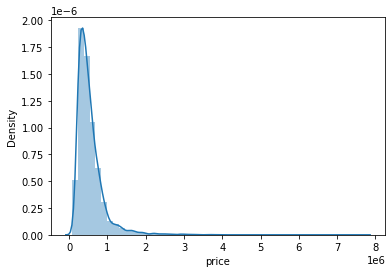

In [39]:
sns.distplot(train['price'])

In [40]:
train['price'] = sp.special.log1p(train['price'])

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

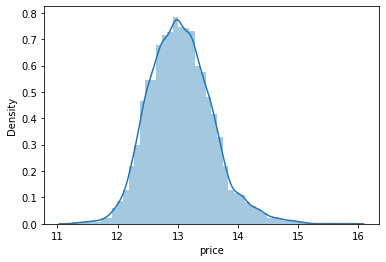

In [41]:
sns.distplot(train['price'])

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms', ylabel='price'>

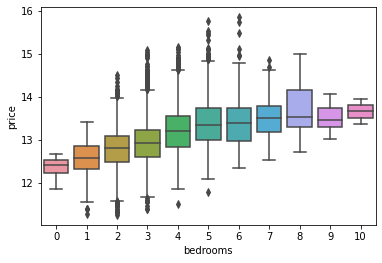

In [42]:
sns.boxplot(train['bedrooms'], train['price'])

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bathrooms', ylabel='price'>

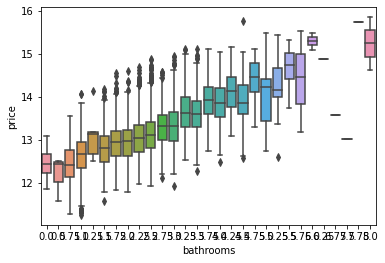

In [43]:
sns.boxplot(train['bathrooms'], train['price'])

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sqft_living', ylabel='price'>

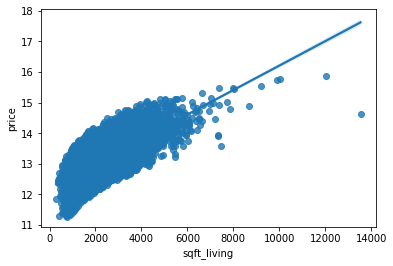

In [44]:
sns.regplot(train['sqft_living'], train['price'])

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sqft_living15', ylabel='price'>

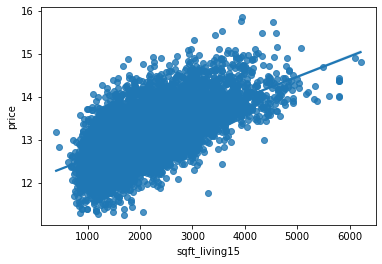

In [45]:
sns.regplot(train['sqft_living15'], train['price'])

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='price'>

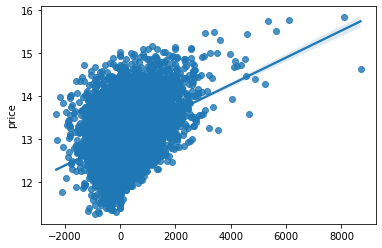

In [46]:
sns.regplot(train['sqft_living']-train['sqft_living15'], train['price'])

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sqft_lot', ylabel='price'>

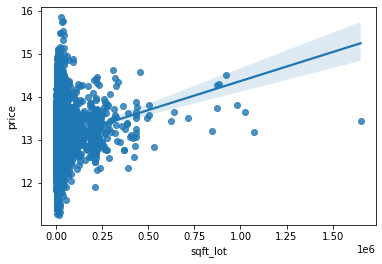

In [47]:
sns.regplot(train['sqft_lot'], train['price'])

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sqft_lot15', ylabel='price'>

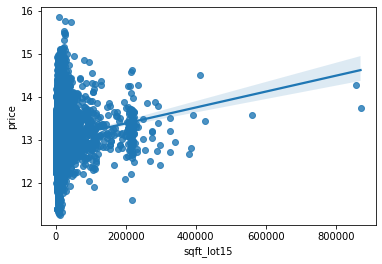

In [48]:
sns.regplot(train['sqft_lot15'], train['price'])

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='price'>

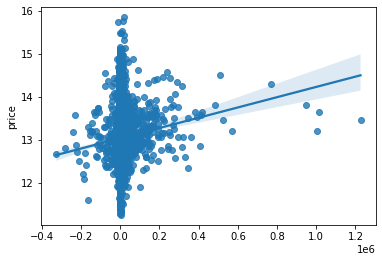

In [49]:
sns.regplot(train['sqft_lot'] - train['sqft_lot15'], train['price'])

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='floors', ylabel='price'>

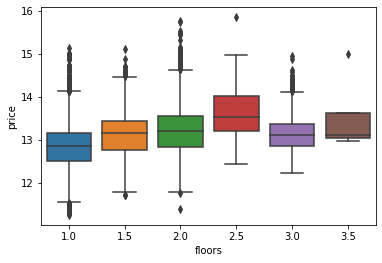

In [50]:
sns.boxplot(train['floors'], train['price'])

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='waterfront', ylabel='price'>

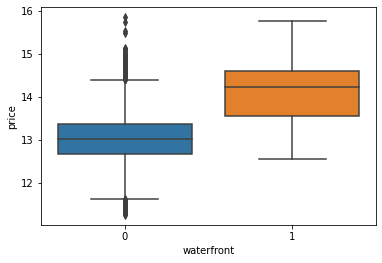

In [51]:
sns.boxplot(train['waterfront'], train['price'])

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='view', ylabel='price'>

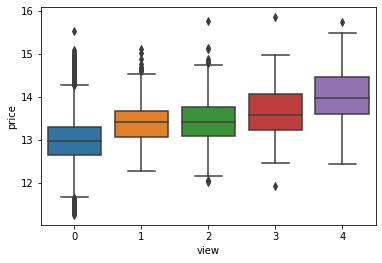

In [52]:
sns.boxplot(train['view'], train['price'])

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='condition', ylabel='price'>

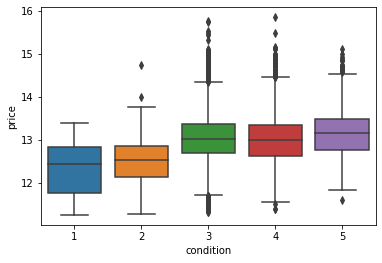

In [53]:
sns.boxplot(train['condition'], train['price'])

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='grade', ylabel='price'>

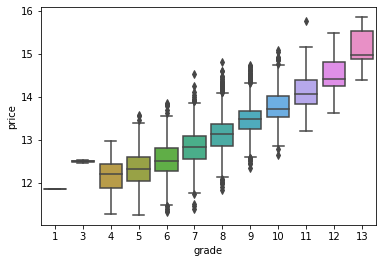

In [54]:
sns.boxplot(train['grade'], train['price'])

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sqft_above', ylabel='price'>

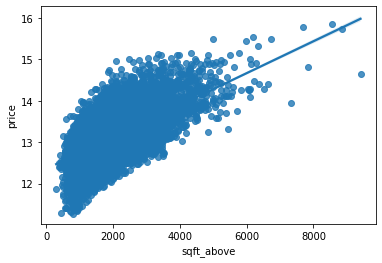

In [55]:
sns.regplot(train['sqft_above'], train['price'])

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sqft_basement', ylabel='price'>

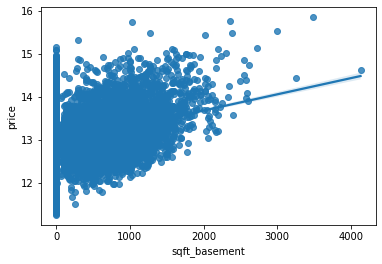

In [56]:
sns.regplot(train['sqft_basement'], train['price'])

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='yr_built', ylabel='price'>

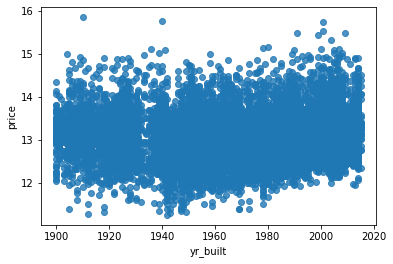

In [57]:
sns.regplot(train['yr_built'], train['price'])

In [58]:
train.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'year', 'month', 'day'],
      dtype='object')

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='price'>

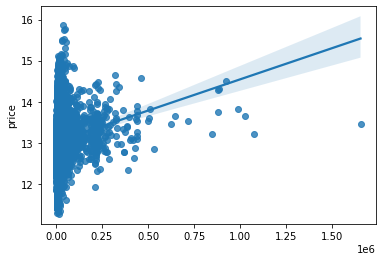

In [59]:
sns.regplot(train['sqft_living'] + train['sqft_lot'], train['price'])

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='price'>

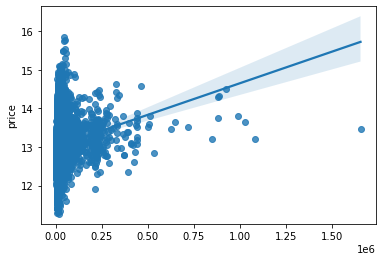

In [60]:
sns.regplot(train['sqft_living'] + train['sqft_lot'] + train['sqft_living15'], train['price'])

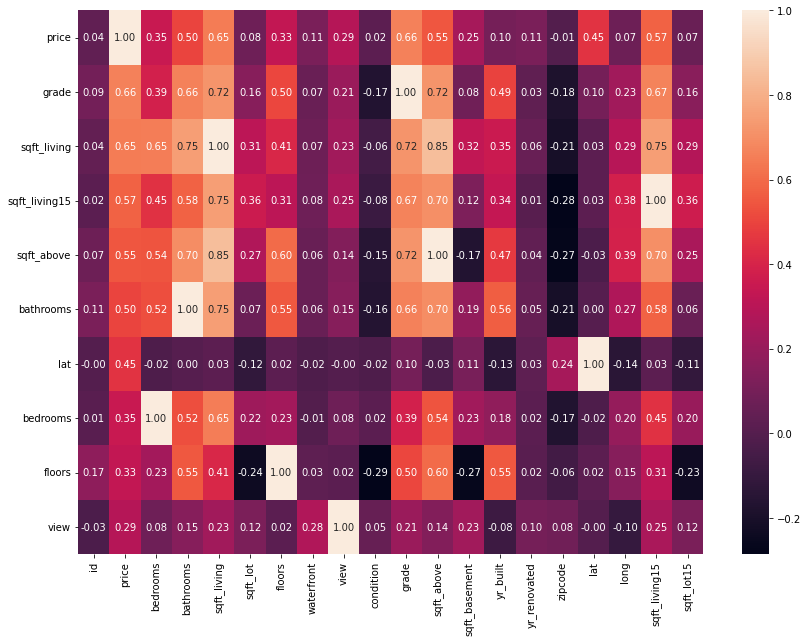

In [61]:
corr = train.corr(method = 'spearman')
corr = corr.nlargest(n = 10, columns = 'price')
plt.figure(figsize = (14, 10))
sns.heatmap(corr, fmt = '.2f', annot = True)
sns.set(font_scale = 1.25)

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='grade', ylabel='price'>

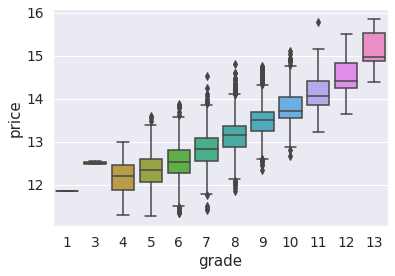

In [62]:
sns.boxplot(train['grade'], train['price'])

In [63]:
train[train['grade'] >= 13]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
3134,3134,20140804T000000,15.532906,5,5.75,9200,35069,2.0,0,0,...,2001,0,98039,47.6289,-122.233,3560,24345,2014,08,04
3867,3867,20141010T000000,14.392124,4,3.25,4890,13402,2.0,0,0,...,2004,0,98059,47.5303,-122.131,5790,13539,2014,10,10
4266,4266,20141120T000000,14.684710,4,4.00,6330,13296,2.0,0,2,...,2000,0,98033,47.6488,-122.201,2200,9196,2014,11,20
4957,4957,20140701T000000,15.150512,5,5.50,7050,42840,1.0,0,2,...,1978,0,98004,47.6229,-122.220,5070,20570,2014,07,01
5108,5108,20141013T000000,15.856731,6,8.00,12050,27600,2.5,0,3,...,1910,1987,98102,47.6298,-122.323,3940,8800,2014,10,13
5560,5560,20140923T000000,14.978662,6,5.00,7100,18200,2.5,0,0,...,1933,2002,98199,47.6427,-122.408,3130,6477,2014,09,23
6469,6469,20140919T000000,15.744856,6,7.75,9890,31374,2.0,0,4,...,2001,0,98039,47.6305,-122.240,4540,42730,2014,09,19
7246,7246,20141212T000000,14.908440,5,5.50,7400,18898,2.0,0,3,...,2001,0,98006,47.5431,-122.112,6110,26442,2014,12,12
10152,10152,20140611T000000,14.876075,5,6.25,8670,64033,2.0,0,4,...,1965,2003,98177,47.7295,-122.372,4140,81021,2014,06,11


In [64]:
test[test['grade'] >= 13]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
1366,16401,20150304T000000,5,3.75,6810,7500,2.5,0,0,3,...,1922,0,98102,47.6285,-122.322,2660,7500,2015,03,04
3987,19022,20150130T000000,5,4.75,7880,24250,2.0,0,2,3,...,1996,0,98177,47.7334,-122.362,2740,10761,2015,01,30
4078,19113,20150420T000000,4,2.50,4500,35200,1.0,0,0,3,...,1988,0,98006,47.5477,-122.126,4760,35200,2015,04,20
5695,20730,20140911T000000,3,4.25,5510,35000,2.0,0,4,3,...,1997,0,98177,47.7296,-122.370,3430,45302,2014,09,11


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sqft_living', ylabel='price'>

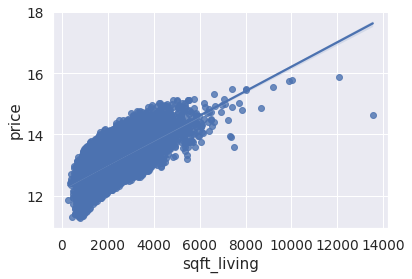

In [65]:
sns.regplot(train['sqft_living'], train['price'])

In [66]:
train[train['sqft_living'] >= 8000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
842,842,20141020T000000,15.446867,5,5.25,8010,45517,2.0,1,4,...,1999,0,98033,47.6767,-122.211,3430,26788,2014,10,20
1045,1045,20150413T000000,15.492607,5,5.00,8000,23985,2.0,0,4,...,2009,0,98004,47.6232,-122.220,4600,21750,2015,04,13
2775,2775,20140611T000000,15.770310,5,4.50,10040,37325,2.0,1,2,...,1940,2001,98004,47.6500,-122.214,3930,25449,2014,06,11
3134,3134,20140804T000000,15.532906,5,5.75,9200,35069,2.0,0,0,...,2001,0,98039,47.6289,-122.233,3560,24345,2014,08,04
5108,5108,20141013T000000,15.856731,6,8.00,12050,27600,2.5,0,3,...,1910,1987,98102,47.6298,-122.323,3940,8800,2014,10,13
6469,6469,20140919T000000,15.744856,6,7.75,9890,31374,2.0,0,4,...,2001,0,98039,47.6305,-122.240,4540,42730,2014,09,19
8912,8912,20140505T000000,14.639686,7,8.00,13540,307752,3.0,0,4,...,1999,0,98053,47.6675,-121.986,4850,217800,2014,05,05
10152,10152,20140611T000000,14.876075,5,6.25,8670,64033,2.0,0,4,...,1965,2003,98177,47.7295,-122.372,4140,81021,2014,06,11


In [67]:
test[test['sqft_living'] >= 8000]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
2365,17400,20140617T000000,5,6.75,9640,13068,1.0,1,4,3,...,1983,2009,98040,47.5570,-122.210,3270,10454,2014,06,17
5475,20510,20140702T000000,5,6.25,8020,21738,2.0,0,0,3,...,2001,0,98006,47.5675,-122.189,4160,18969,2014,07,02


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sqft_living15', ylabel='price'>

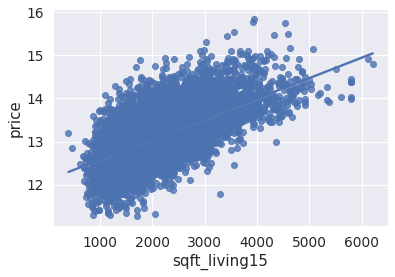

In [68]:
sns.regplot(train['sqft_living15'], train['price'])

In [69]:
train[train['sqft_living15'] >= 6000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
7246,7246,20141212T000000,14.908440,5,5.5,7400,18898,2.0,0,3,...,2001,0,98006,47.5431,-122.112,6110,26442,2014,12,12
13809,13809,20150122T000000,14.808763,4,4.0,7850,89651,2.0,0,0,...,2006,0,98027,47.5406,-121.982,6210,95832,2015,01,22


In [70]:
test[test['sqft_living15'] >= 6000]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sqft_above', ylabel='price'>

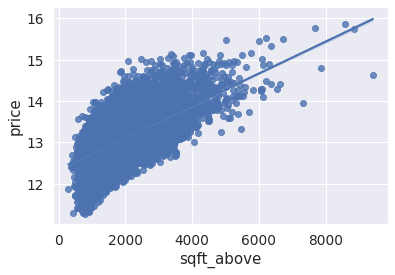

In [71]:
sns.regplot(train['sqft_above'], train['price'])

In [72]:
train[train['sqft_above'] >= 7000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
2775,2775,20140611T000000,15.770310,5,4.50,10040,37325,2.0,1,2,...,1940,2001,98004,47.6500,-122.214,3930,25449,2014,06,11
5108,5108,20141013T000000,15.856731,6,8.00,12050,27600,2.5,0,3,...,1910,1987,98102,47.6298,-122.323,3940,8800,2014,10,13
6469,6469,20140919T000000,15.744856,6,7.75,9890,31374,2.0,0,4,...,2001,0,98039,47.6305,-122.240,4540,42730,2014,09,19
8912,8912,20140505T000000,14.639686,7,8.00,13540,307752,3.0,0,4,...,1999,0,98053,47.6675,-121.986,4850,217800,2014,05,05
12921,12921,20140708T000000,13.942364,5,4.00,7320,217800,2.0,0,0,...,1992,0,98058,47.4473,-122.086,3270,34500,2014,07,08
13809,13809,20150122T000000,14.808763,4,4.00,7850,89651,2.0,0,0,...,2006,0,98027,47.5406,-121.982,6210,95832,2015,01,22


In [73]:
test[test['sqft_above'] >= 7000]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
3530,18565,20150112T000000,4,3.25,7420,167869,2.0,0,3,3,...,2002,0,98045,47.4548,-121.764,5610,169549,2015,01,12
3987,19022,20150130T000000,5,4.75,7880,24250,2.0,0,2,3,...,1996,0,98177,47.7334,-122.362,2740,10761,2015,01,30
5475,20510,20140702T000000,5,6.25,8020,21738,2.0,0,0,3,...,2001,0,98006,47.5675,-122.189,4160,18969,2014,07,02


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bathrooms', ylabel='price'>

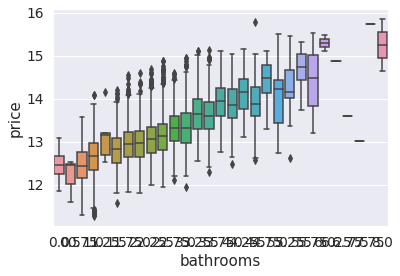

In [74]:
sns.boxplot(train['bathrooms'], train['price'])

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bathrooms', ylabel='Density'>

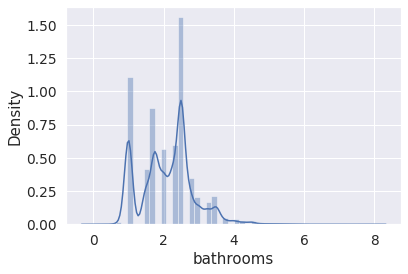

In [75]:
sns.distplot(train['bathrooms'])

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bathrooms', ylabel='Density'>

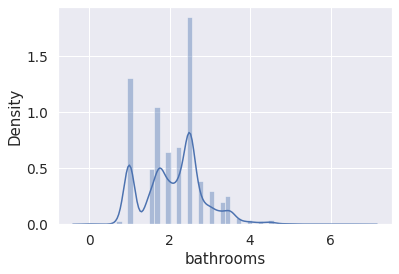

In [76]:
sns.distplot(test['bathrooms'])

In [77]:
train[train['bathrooms'] > 6]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
2859,2859,20141007T000000,13.592368,7,6.75,7480,41664,2.0,0,2,...,1953,0,98166,47.4643,-122.368,2810,33190,2014,10,07
5108,5108,20141013T000000,15.856731,6,8.00,12050,27600,2.5,0,3,...,1910,1987,98102,47.6298,-122.323,3940,8800,2014,10,13
5990,5990,20140811T000000,13.017005,9,7.50,4050,6504,2.0,0,0,...,1996,0,98144,47.5923,-122.301,1448,3866,2014,08,11
6469,6469,20140919T000000,15.744856,6,7.75,9890,31374,2.0,0,4,...,2001,0,98039,47.6305,-122.240,4540,42730,2014,09,19
8912,8912,20140505T000000,14.639686,7,8.00,13540,307752,3.0,0,4,...,1999,0,98053,47.6675,-121.986,4850,217800,2014,05,05
10152,10152,20140611T000000,14.876075,5,6.25,8670,64033,2.0,0,4,...,1965,2003,98177,47.7295,-122.372,4140,81021,2014,06,11


In [78]:
test[test['bathrooms'] > 6]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
2365,17400,20140617T000000,5,6.75,9640,13068,1.0,1,4,3,...,1983,2009,98040,47.5570,-122.210,3270,10454,2014,06,17
5475,20510,20140702T000000,5,6.25,8020,21738,2.0,0,0,3,...,2001,0,98006,47.5675,-122.189,4160,18969,2014,07,02
6167,21202,20150328T000000,6,6.50,6260,10955,2.0,0,0,3,...,2007,0,98075,47.5947,-122.039,2710,12550,2015,03,28
6440,21475,20140509T000000,5,6.50,7270,130017,2.0,0,0,3,...,2010,0,98027,47.5371,-121.982,1800,44890,2014,05,09


In [79]:
test_id = test.id

In [80]:
for df in [train, test]:
    df.drop(columns = ['id', 'date', 'lat', 'long'], inplace = True)

In [81]:
K_fold = KFold(n_splits = 10, shuffle = True, random_state = 42)

In [82]:
X_train = train.drop(columns = 'price')
y_train = train.price

In [83]:
clf = RandomForestRegressor(n_estimators = 15, n_jobs = -1)

In [84]:
scoring = make_scorer(mse)
score = cross_val_score(clf, X_train, y_train, cv = K_fold, n_jobs = 1, scoring = scoring)

In [85]:
print(sp.special.expm1(score) ** 0.5)

[0.22607365 0.22942902 0.22578352 0.23840637 0.22717509 0.23153824
 0.22662809 0.22639984 0.2354102  0.23709134]


In [86]:
clf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=15, n_jobs=-1)

In [87]:
prediction = clf.predict(test)

In [88]:
prediction = sp.special.expm1(prediction)

In [89]:
prediction

array([ 545405.04768119,  427561.05736705, 1266811.92501747, ...,
        473724.93207309,  314199.1677416 ,  467744.97519892])